# Project - Supervised Learning

#### Submitted by Abhik Kar
#### Dated - 05-Apr-2020

### Banking Domain
* Customer survey data of Thera Bank
* Data holds customer demographic information
#### Problem Statement
* Bank wants to identify or predict or classify who are potential customer who will accept Personal Loan Offers out of it's liability customers
* Predict the likelihood of a liability customer buying personal loans.
#### Solution
* Build a model that predicts and classify best in this context

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the csv file into a dataframe 'cust_data'
cust_data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

### Exploratory Data Analysis

In [3]:
print(cust_data.shape)

(5000, 14)


* 5000 customer data i.e. number of rows and 14 attributes i.e. number of column

In [4]:
cust_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Understanding column description and each attribute in the DataFrame

###### Not required for building the model and hence can be dropped
* ID : Customer ID
###### Continous Variable & Will include for further EDA
* Age : Customer's age in completed years
* Experience : #years of professional experience
* Income : Annual income of the customer
* ZIP Code : Home Address ZIP code
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month
* Mortgage : Value of house mortgage if any
###### Categorical Variable & Will include for further EDA
* Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* Credit card : Does the customer use a credit card issued by UniversalBank?
###### Target Variable is a Categorical Variable which will be used to predict which customers will buy Personal loan or accept personal loan offer from the survey 
* Personal Loan : Target variable or dependent variable is 'Personal Loan' as the model should predict customers who are likely to accept personal loan offer

#### Target Column Distribution - 'Personal Loan' is Target Variable

In [5]:
cust_data["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

#### Checking Data Distribution of 'Personal Loan' across all variables

In [6]:
cust_data.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [7]:
cust_data["Education"].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [8]:
cust_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
cust_data = cust_data.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cust_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
cust_data.tail()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [11]:
cust_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

* All attributes are of number i.e. integer / float type
* Education is a categorical veriable. Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* For Regression model Education variable needs to be converted using One Hot Encoding 

In [12]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [13]:
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Missing Value Analysis

#### Strategies to address the different data challenges such as data pollution, outliers and missing values

In [14]:
cust_data.isnull().values.any()

False

In [15]:
cust_data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

* Clearly there in no Null value present

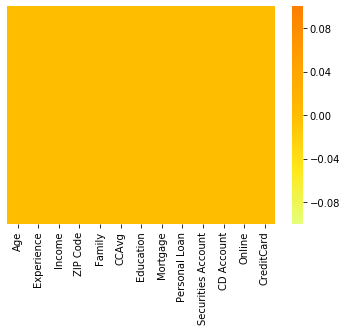

In [16]:
sns.heatmap(cust_data.isnull(), yticklabels=False, cmap="Wistia")

* As No Null value present. Hence the heatmap shows clean

### Exploratory Data Analysis

#### Univariate analysis & Bivariate analysis

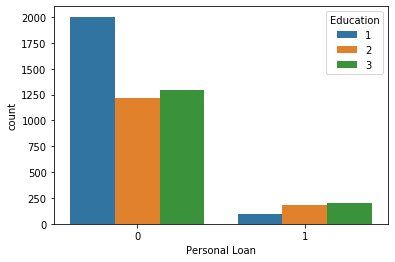

In [17]:
sns.countplot(x="Personal Loan", hue="Education" , data=cust_data)

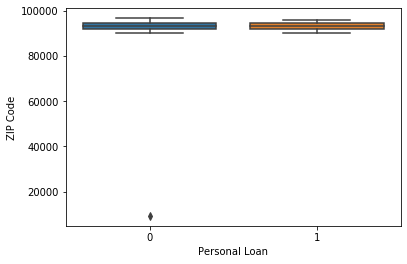

In [18]:
sns.boxplot(x="Personal Loan", y="ZIP Code", data=cust_data)

* This shows customer data is collected or the survey conducted from the same area or zip code. 
* This column has no significance in our prediction model
* Hence this column can be safely dropped

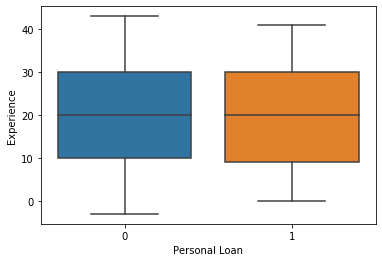

In [19]:
sns.boxplot(x="Personal Loan", y="Experience" , data=cust_data)

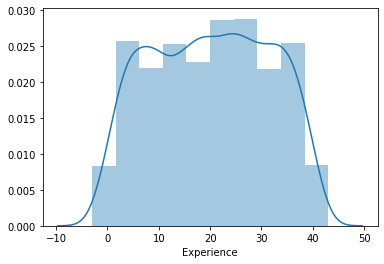

In [20]:
sns.distplot(cust_data['Experience'],kde=True,bins=10)

* Negative Experince are garbage value and need to be replaced with Mean
* Based on further analysis either we would need to replace the garbage value with mean or drop the column if it's not required

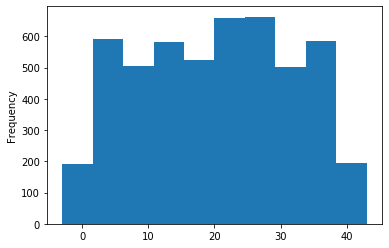

In [21]:
cust_data['Experience'].plot.hist()

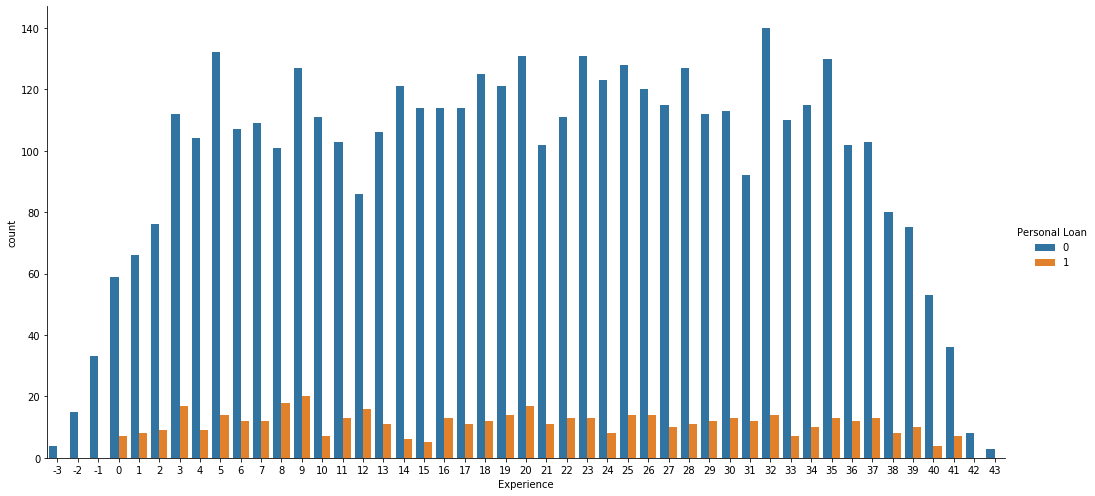

In [22]:
 sns.catplot(x="Experience", hue="Personal Loan", data=cust_data, kind="count",height=7, aspect=2)

* The IQR of customer #years of professional experience lies between 10-30 years. 
* The distribution is not a bell shaped or normal distribution.
* This shows that there is no sinificant difference in the distribution of customers Experiece for all customers who accepted personal loan and who didn't
* Hence this column has no significant influence on the dependent variabe 'Personal Loan'

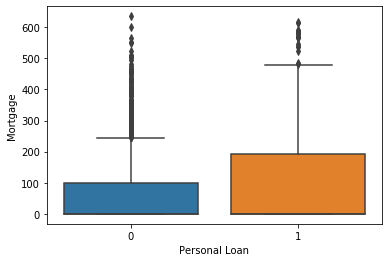

In [23]:
sns.boxplot(x="Personal Loan", y="Mortgage", data=cust_data)

* There are outlier presents in boths category of customers who accepted personal loan and who didn't. These outlier customers have very high Value of house mortgage  
* This also shows Customers with higher Value of house mortgage are likely to accept personal loan offer more.

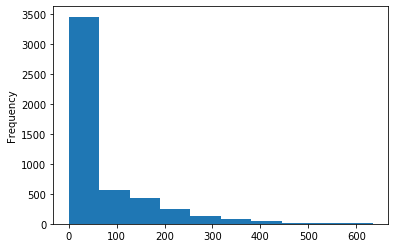

In [24]:
cust_data['Mortgage'].plot.hist()

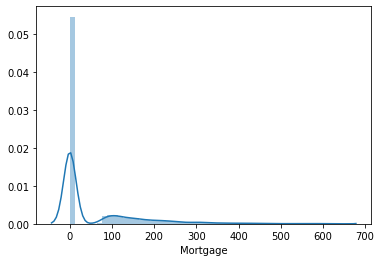

In [25]:
sns.distplot(cust_data['Mortgage'])

* Data in mortgage data has Outlier and highly skewed

In [26]:
#Mortgage is highly skewed - so deleting this column
cust_data.drop(['Mortgage'], axis=1, inplace = True)

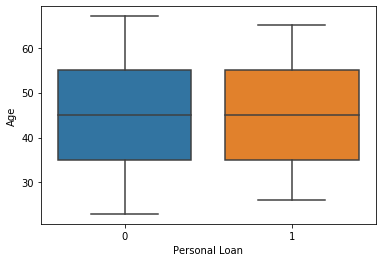

In [27]:
sns.boxplot(x="Personal Loan", y="Age", data=cust_data)

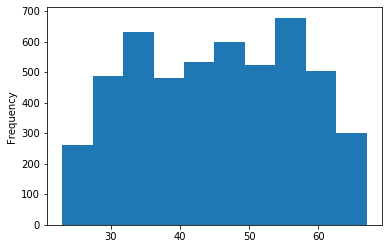

In [28]:
cust_data['Age'].plot.hist()

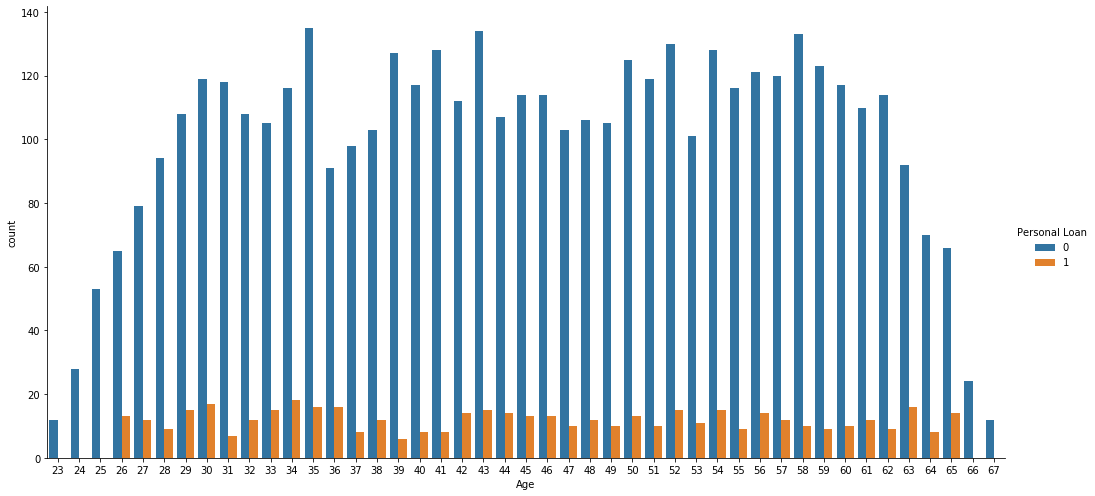

In [29]:
 sns.catplot(x="Age", hue="Personal Loan", data=cust_data, kind="count",height=7, aspect=2)

* This shows it's not a bell shape or normal distribution and across the customer with different age there is no specific distribution  who accepted personal loan and who didn't
* Hence this column has no significance in our prediction model.

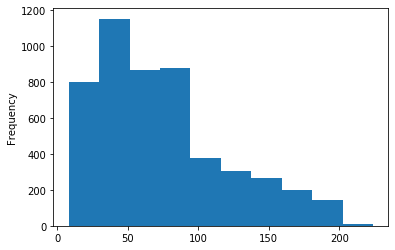

In [30]:
cust_data['Income'].plot.hist()

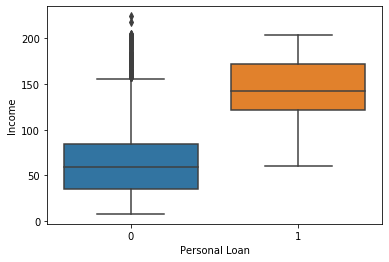

In [31]:
sns.boxplot(x="Personal Loan", y="Income", data=cust_data)

* This shows there are ourliers in the Income and those customers with higher income didn't accept personal loan offer
* From the distribution of the customers who accepted the personal loan offer, this clearly signifies customers with higher annual income are likely to accept Personal Loan offer

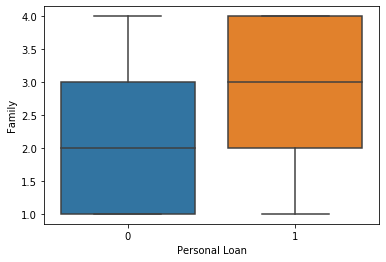

In [32]:
sns.boxplot(x="Personal Loan", y="Family", data=cust_data)

* This signifies customers having family size 2 or more likely to accept personal loan offer

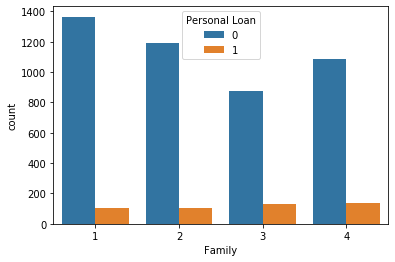

In [33]:
sns.countplot(x="Family", hue="Personal Loan", data=cust_data)

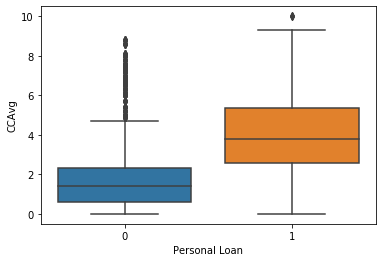

In [34]:
sns.boxplot(x="Personal Loan", y="CCAvg", data=cust_data)

* This clearly shows Customers having more Avg. spending on credit cards per month likely to accept personal loan offer 

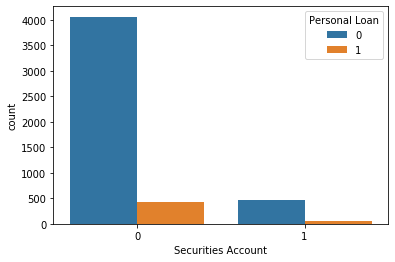

In [35]:
sns.countplot(x="Securities Account", hue="Personal Loan", data=cust_data)

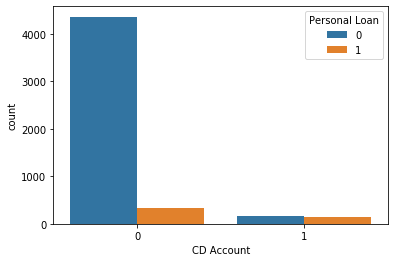

In [36]:
sns.countplot(x="CD Account", hue="Personal Loan", data=cust_data)

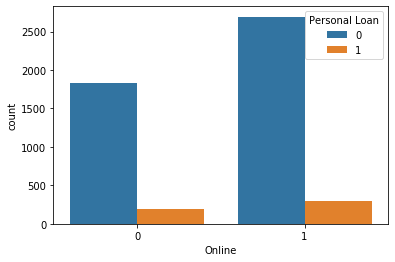

In [37]:
sns.countplot(x="Online", hue="Personal Loan", data=cust_data)

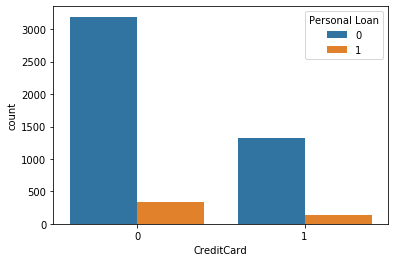

In [38]:
sns.countplot(x="CreditCard", hue="Personal Loan", data=cust_data)

In [39]:
#Moving the target variable 'Personal Loan' to the right in the dataframe
cust_data= cust_data[['Age', 'Experience','Income', 'Family', 'CCAvg', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Education','Personal Loan']]

In [40]:
cust_data.head(3)

,Age,Experience,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education,Personal Loan
0,25,1,49,4,1.6,1,0,0,0,1,0
1,45,19,34,3,1.5,1,0,0,0,1,0
2,39,15,11,1,1.0,0,0,0,0,1,0


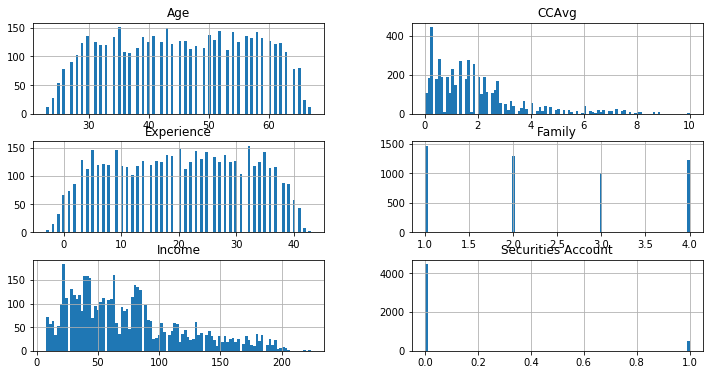

In [41]:
columns = list(cust_data)[0:6] # Excluding Outcome column which has only 
cust_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 6 columns

#### Multivariate analysis

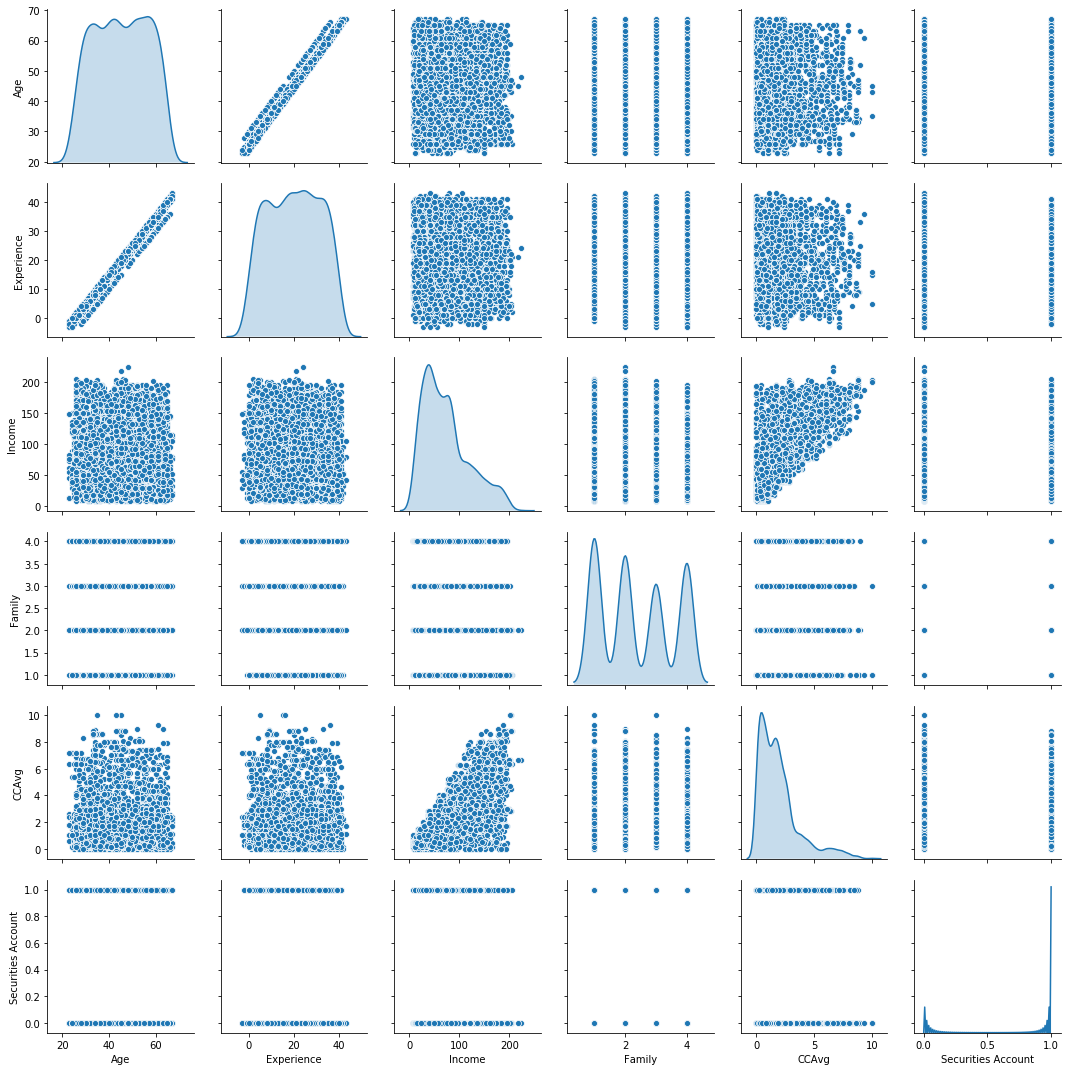

In [42]:
sns.pairplot(cust_data, vars=cust_data.columns[0:6], diag_kind='kde')
plt.show()

In [43]:
# Creating Multivariable correlation matrix
cust_data.corr()

,Age,Experience,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,-0.000436,0.008043,0.013702,0.007681,0.041334,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,-0.001232,0.010353,0.013898,0.008967,0.013152,-0.007413
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.002616,0.169738,0.014206,-0.002385,-0.187524,0.502462
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.019994,0.014110,0.010354,0.011588,0.064929,0.061367
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,0.015086,0.136534,-0.003611,-0.006689,-0.136124,0.366889
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,1.000000,0.317034,0.012627,-0.015028,-0.010812,0.021954
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.317034,1.000000,0.175880,0.278644,0.013934,0.316355
Online,0.013702,0.013898,0.014206,0.010354,-0.003611,0.012627,0.175880,1.000000,0.004210,-0.015004,0.006278
CreditCard,0.007681,0.008967,-0.002385,0.011588,-0.006689,-0.015028,0.278644,0.004210,1.000000,-0.011014,0.002802
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,-0.010812,0.013934,-0.015004,-0.011014,1.000000,0.136722


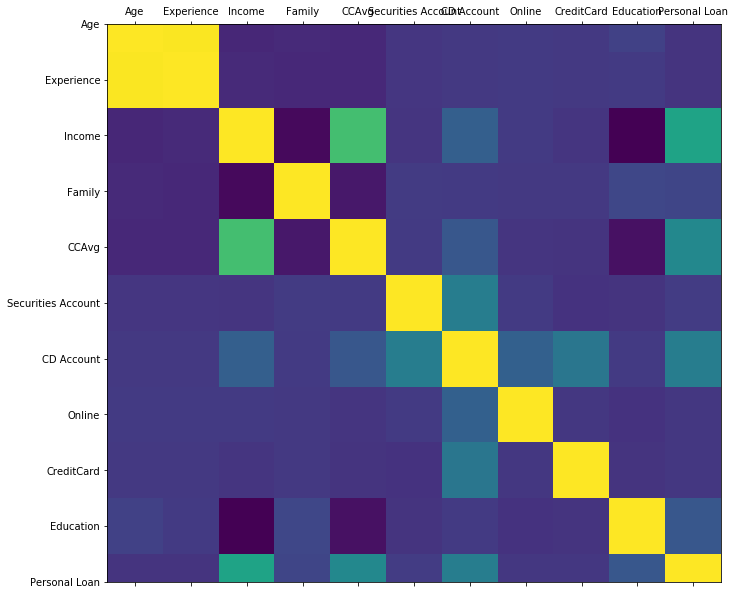

In [44]:
#Graphical representation of the Corelation matrix in a heatmap
def plot_corr(cust_data, size=11):
    corr = cust_data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(cust_data)

* In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. 
* The variable 'Age' has high correlation with 'Experience' variable. As both are independent variable and there shouldn't be two independent variable with high correlation between themselves. Hence Experience can be dropped.
* Influence of Age is on Personal loan is less
* Income has relatively high correlation with Personal Loan
* CD Account also has influence on Personal Loan

In [45]:
cust_data.drop(['Experience'], axis=1, inplace = True)

C:\Users\Abhik Kar\AIML 2020\Python\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Preparing the data to train a model

In [46]:
cust_data['Personal Loan'] = cust_data['Personal Loan'].astype('category')
cust_data['Education'] = cust_data['Education'].astype('category')

C:\Users\Abhik Kar\AIML 2020\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abhik Kar\AIML 2020\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
cust_data.head(3)

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education,Personal Loan
0,25,49,4,1.6,1,0,0,0,1,0
1,45,34,3,1.5,1,0,0,0,1,0
2,39,11,1,1.0,0,0,0,0,1,0


In [48]:
#One Hot Encoding for the categorical variable Education and drop one column
Education_dummy=pd.get_dummies(cust_data['Education'], drop_first=True)
cust_data=pd.concat([cust_data,Education_dummy],axis=1)
cust_data.head(3)

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education,Personal Loan,2,3
0,25,49,4,1.6,1,0,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,0,1,0,0,0
2,39,11,1,1.0,0,0,0,0,1,0,0,0


In [49]:
#Post One Hot Encoding drop the Education column as it's not longer needed
cust_data.drop(['Education'], axis=1, inplace=True)

In [50]:
cust_data.head(3)

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Personal Loan,2,3
0,25,49,4,1.6,1,0,0,0,0,0,0
1,45,34,3,1.5,1,0,0,0,0,0,0
2,39,11,1,1.0,0,0,0,0,0,0,0


## Training and making predictions using a classification model

* Assign dependent and independent variables
* Split the data in Training & Test Set respectively in 70% and 30%

#### Split Data

#### Creating the training set and test set in ration of 70:30

In [51]:
X = cust_data.drop('Personal Loan',axis=1)  #Independent Variables
y = cust_data['Personal Loan']  #Dependent Variable or Target Variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Performing Feature Scaling on the Data
* This ensures all variables scales down to standard normal distributon

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [54]:
print(X_train.shape)
print(y_train.shape)

(3500, 10)
(3500,)


In [55]:
print(X_test.shape)
print(y_test.shape)

(1500, 10)
(1500,)


## Logistic Regression

#### Why Logistic Regression ?
In this Project target variable here is 'Peronal Loan' wheather a customer will accept the offer of a personal Loan or not which is a binary decision and set of independent variables are also provided from past survey. This requires a predictive analysis algorithm which can predict the target variable from past observations. As Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable which is binary or categorical from past observations. Also the data provided here are structured. Hence in this scenarion Logistic Probability is a definite choice to predict the dependent variable. We further will evaluate and determne wheather Logistic Regression will be the best model to predit if customer will accept the offer of a personal Loan or not.

In [56]:
# Load sklearn Librairy for Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression() #Build the logistic regression model & instantiate learning model
logmodel.fit(X_train, y_train) #Fitting the model

C:\Users\Abhik Kar\AIML 2020\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Training model using Training Data

In [57]:
predict_train = logmodel.predict(X_train) # predict the test set results

In [58]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [59]:
# Training score to check accuracy of model
score = logmodel.score(X_train, y_train)
print(round(score*100,2),'%')

95.8 %


#### Predict using test data & Evaluate Acuracy of the Model

In [60]:
predict_test = logmodel.predict(X_test)
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.65      0.75       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.95      1500



In [61]:
confumat_test = metrics.confusion_matrix(y_test,predict_test)
print("Logistic Regression Model Confusion matrix = \n",confumat_test)

Logistic Regression Model Confusion matrix = 
 [[1340   11]
 [  52   97]]


Logistic Regression - Confusion Matrix


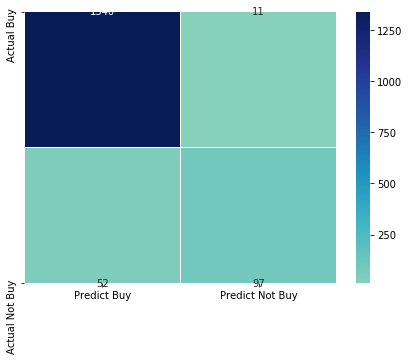

In [62]:
from sklearn import metrics
print("Logistic Regression - Confusion Matrix")
cust_data_lr = pd.DataFrame(confumat_test, index = [i for i in ["Actual Buy","Actual Not Buy"]], 
                            columns = [i for i in ["Predict Buy","Predict Not Buy"]])
plt.figure(figsize = (7,5))
sns.heatmap(cust_data_lr, fmt="d", linewidths=.5, center=300, cmap="YlGnBu", annot=True)

In [63]:
# Evaluate accuracy of model
score = logmodel.score(X_test, y_test)
print('Accuracy of the Logistic Regression Model is', round(score*100,2),'%')

Accuracy of the Logistic Regression Model is 95.8 %


#### AUC ROC Curve and FPR & TPR for all thresholds of the Logistic Regression Model

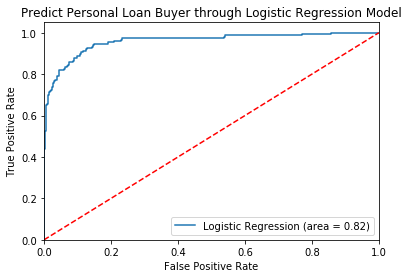

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predict Personal Loan Buyer through Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
print(round( float(logit_roc_auc)*100, 2 ),'%')

82.14 %


#### Logistic Regression with Hyper Parameter Tuning using GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV
parameters = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs'],
    'max_iter' : [100, 200, 500]
    },
{'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg'],
    'max_iter' : [100, 200, 500]
    },
{'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter' : [100, 200, 500]
    },
{'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['sag'],
    'max_iter' : [100, 200, 500]
    }
]

In [67]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logmodel,
    parameters,
    scoring='accuracy',
    n_jobs= -1,
    cv=5)

In [68]:
# Fit grid search
clf = clf.fit(X_train, y_train)

In [69]:
accuracy = clf.best_score_
print((accuracy*100),'%')

95.71428571428572 %


In [70]:
clf.best_params_

{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

##### Best accuracy and Best Parameters using Confusion Matrix & Print Classification Report to check precision, recall & F1 Score

In [71]:
#Build the Best logistic regression model based on Hyper Parameter Tuning Results
logmodel= LogisticRegression(C=1.623776739188721, penalty='l2',max_iter=100, solver ='lbfgs')
logmodel.fit(X_train, y_train) #Fitting the Best model

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predict_train = logmodel.predict(X_train) # predict the trainig data set results
predict_test = logmodel.predict(X_test) # predict the test set results

In [73]:
confumat_test = metrics.confusion_matrix(y_test,predict_test)
print("Logistic Regression Model Confusion matrix after Hyper Parameter Tuning= \n",confumat_test)

Logistic Regression Model Confusion matrix after Hyper Parameter Tuning= 
 [[1340   11]
 [  52   97]]


In [74]:
# Evaluate accuracy of model after Hyper Parameter Tuning
score = logmodel.score(X_test, y_test)
print('Accuracy of the Logistic Regression Model is', round(score*100,2),'%')

Accuracy of the Logistic Regression Model is 95.8 %


In [75]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.65      0.75       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.95      1500



* Recall 65% which means 65% are correctly predicted out of all the ones which are actually observed 
* Precision 90% which means 90% are correctly predicted out of all the ones which are predicted positive
* f1-Score 75% which is combination of both Recall & Precision

In [76]:
# sklearn Libraries for KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [77]:
# Check acuracy of the model starting with k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

96.33 %


In [78]:
# Check acuracy of the model starting with k=3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

96.47 %


In [79]:
# Check acuracy of the model starting with k=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

96.13 %


In [80]:
# Check acuracy of the model starting with k=7
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

96.13 %


In [81]:
# Check acuracy of the model starting with k=9
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

95.73 %


In [82]:
# Check acuracy of the model starting with k=11
knn = KNeighborsClassifier(n_neighbors =11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

95.47 %


#### Key Hyper Parameters Tuning - Finding Best Value for K

In [83]:
# creating odd list of K for KNN
myList = list(range(1,51))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [84]:
# Empty list that will hold accuracy scores
ac_scores = []

# performing accuracy metrics for values from 1,3,5....50
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# Misclassification error:
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


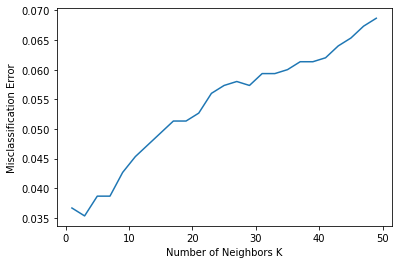

In [85]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

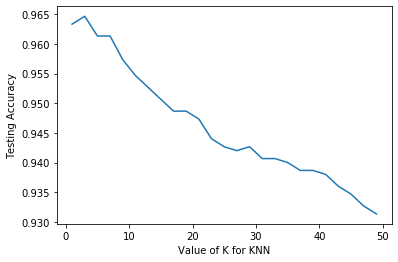

In [86]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# plot the relationship between K and testing accuracy
plt.plot(neighbors, ac_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

* K=3 provides a highest Testing Accuracy and lowest Misclassification error (MSE)
* Testing accuracy penalizes models that are too complex or not complex enough i
* For KNN models, complexity is determined by the value of K

In [87]:
# Final Accuracy Score & Recall Score of KNN model for Optimum K value K=3
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s=accuracy_score(y_test, y_pred)
print('KNN Model Accuracy Score (K=3) =', round(s*100,2),'%')

KNN Model Accuracy Score (K=3) = 96.47 %


* At K=3, KNN Model will predict customers who will accept or buy Personal Loan with good accuracy

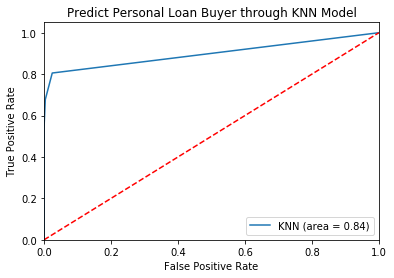

In [88]:
#AUC ROC curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predict Personal Loan Buyer through KNN Model')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.95      0.68      0.79       149

    accuracy                           0.96      1500
   macro avg       0.96      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [90]:
from sklearn import metrics
confumat_test_KNN = metrics.confusion_matrix(y_test,y_pred)
print("KNN Model Confusion matrix = \n",confumat_test_KNN)

KNN Model Confusion matrix = 
 [[1346    5]
 [  48  101]]


Confusion Matrix


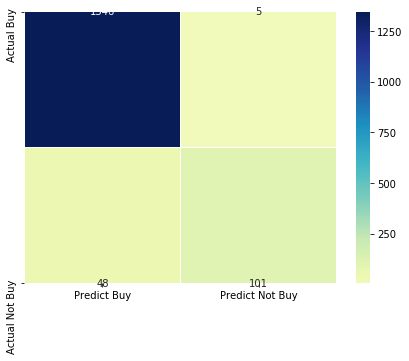

In [91]:
print("Confusion Matrix")
cust_data_lr = pd.DataFrame(confumat_test_KNN, index = [i for i in ["Actual Buy","Actual Not Buy"]], 
                            columns = [i for i in ["Predict Buy","Predict Not Buy"]])
plt.figure(figsize = (7,5))
sns.heatmap(cust_data_lr, fmt="d", linewidths=.5, center=600, cmap="YlGnBu", annot=True)

##### Best accuracy and Best Parameters using Confusion Matrix & Print Classification Report to check precision, recall & F1 Score

In [92]:
param = [{'weights': ['uniform'],'p': [1], 'n_neighbors': [ 3, 5, 7, 11, 13, 21, 31, 35, 39, 41, 51, 61, 71, 81, 91, 101]},
         {'weights': ['uniform'],'p': [2], 'n_neighbors': [ 3, 5, 7, 11, 13, 21, 31, 35, 39, 41, 51, 61, 71, 81, 91, 101]}
         ]

# Create grid search using 10-fold cross validation
clf = GridSearchCV(estimator = knn,
    param_grid = param,
    scoring='accuracy',
    n_jobs= -1,
    cv = 10)

In [93]:
# Fit grid search
best_model = clf.fit(X_test, y_test)

In [94]:
accuracy = best_model.best_score_
accuracy

0.9573333333333334

In [95]:
best_model.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

In [96]:
knn = KNeighborsClassifier(n_neighbors = 3, weights='uniform', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

96.47 %


In [97]:
predict_test = knn.predict(X_test) # predict the test set results
confumat_test = metrics.confusion_matrix(y_test,predict_test)
print("KNN Classifier Model Confusion matrix after Hyper Parameter Tuning= \n",confumat_test)

KNN Classifier Model Confusion matrix after Hyper Parameter Tuning= 
 [[1346    5]
 [  48  101]]


In [98]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.95      0.68      0.79       149

    accuracy                           0.96      1500
   macro avg       0.96      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



* Recall 68% which means 68% are correctly predicted out of all the ones which are actually observed 
* Precision 95% which means 95% are correctly predicted out of all the ones which are predicted positive
* f1-Score 79% which is combination of both Recall & Precision

## Naive Bayes Classification Model

#### Why Naive Bayes Classifier?
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. Naive bayes classifier calculates the probability of a class a set of feature values. As in this project our target variable is 'Personal Loan' and we intent to predict if the customer will accept the personal loan offer or not which is a binary or classification problem. Also the given independent cutomer demographic data it is possible to predict the probability of accepting personal loan offer using Naive Bayes Classifier.

In [99]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [100]:
GausNB = GaussianNB() #Build the model or instantiate learning model
GausNB.fit(X_train, y_train) #Fitting the data and training the Model

GaussianNB(priors=None, var_smoothing=1e-09)

* Now Gaussian Naive Bayes classifier Model is built. 
* The classifier is trained using training data. 
* Model is ready to make predictions.

In [101]:
y_test_GNB = GausNB.predict(X_test)

In [102]:
#Accuracy of Gaussian Naive Bayes model
GNB= accuracy_score(y_test, y_test_GNB, normalize = True)
print ('Accuracy of Gaussian Naive Bayes model =',round(GNB,2)*100,'%')

Accuracy of Gaussian Naive Bayes model = 88.0 %


In [103]:
from sklearn import metrics
confumat_test_GNB = metrics.confusion_matrix(y_test,y_test_GNB)
print("Gaussian Naive Bayes Model Confusion matrix = \n",confumat_test_GNB)

Gaussian Naive Bayes Model Confusion matrix = 
 [[1244  107]
 [  71   78]]


In [104]:
print(classification_report(y_test, y_test_GNB))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.42      0.52      0.47       149

    accuracy                           0.88      1500
   macro avg       0.68      0.72      0.70      1500
weighted avg       0.89      0.88      0.89      1500



* Recall 52% which means 52% are correctly predicted out of all the ones which are actually observed 
* Precision 42% which means 41% are correctly predicted out of all the ones which are predicted positive
* f1-Score 79% which is combination of both Recall & Precision

Gaussian Naive Bayes Model - Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


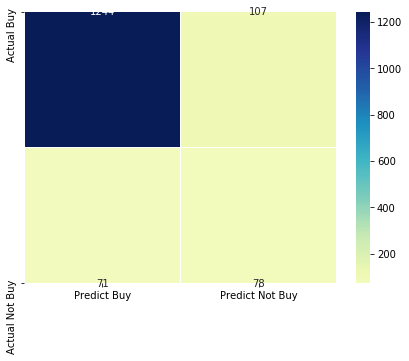

In [105]:
print("Gaussian Naive Bayes Model - Confusion Matrix")
cust_data_GNB = pd.DataFrame(confumat_test_GNB, index = [i for i in ["Actual Buy","Actual Not Buy"]], 
                            columns = [i for i in ["Predict Buy","Predict Not Buy"]])
plt.figure(figsize = (7,5))
print(sns.heatmap(cust_data_GNB, fmt="d", linewidths=.5, center=600, cmap="YlGnBu", annot=True))

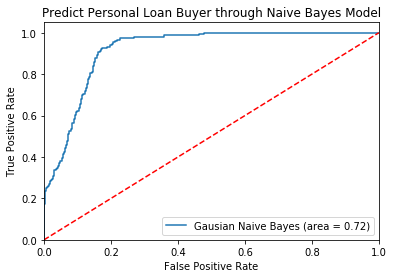

In [106]:
#Naive Bayes Model - AUC ROC curve
GausNB_roc_auc = roc_auc_score(y_test, GausNB.predict(X_test))
fpr3, tpr3, thresholds3 = roc_curve(y_test, GausNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr3, tpr3, label='Gausian Naive Bayes (area = %0.2f)' % GausNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predict Personal Loan Buyer through Naive Bayes Model')
plt.legend(loc="lower right")
plt.savefig('GausNB_ROC')
plt.show()

### Comparing Logistic Regression, Naive Bayes & KNN Model resuts in predicting buyer of Personal Loan product

#### Comparing Accuracy Score
* Accuracy of Gaussian Naive Bayes model = 88.0 %
* KNN Model Accuracy Score (K=3)  = 96.47 %
* Accuracy of the Logistic Regression Model is 95.8 %

#### Comparing AUC ROC Curve Area using  fpr and tpr for all thresholds of the classification
* AUC ROC Curve Area of Gaussian Naive Bayes model = 0.72
* AUC ROC Curve Area of KNN model = 0.84
* AUC ROC Curve Area of Logistic Regression model = 0.82

#### Comparing Recall & Precision 

###### Logistic Regression
* Recall 65% which means 65% are correctly predicted out of all the ones which are actually observed 
* Precision 90% which means 90% are correctly predicted out of all the ones which are predicted positive
* f1-Score 75% which is combination of both Recall & Precision

###### KNN
* Recall 68% which means 68% are correctly predicted out of all the ones which are actually observed 
* Precision 95% which means 95% are correctly predicted out of all the ones which are predicted positive
* f1-Score 79% which is combination of both Recall & Precision

###### Naive Bayes Model
* Recall 52% which means 52% are correctly predicted out of all the ones which are actually observed 
* Precision 42% which means 41% are correctly predicted out of all the ones which are predicted positive
* f1-Score 47% which is combination of both Recall & Precision

##### Conclusion

As the intend here is to predict binary wheather or not a customer will accept offer of personal loan and buy. For this kind of decisioning model how many are correctly predicted out of all the ones which are predicted positive takes precedence. Eventhough both logistic regression and KNN model both performed well, KNN has higher precision alogn with Area Under Cuve in ROC curve is higher. Also f1-Score is also higher in case of KNN model. KNN model will be able to very well in predict the target variable

### Hence can be concluded in this case The KNN Classifier Model is the best suitable model for predicting the likelyhood of customers to accept the Personal Loan offer

#                                                Thank You